In [1]:
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [537]:
housing_df= pd.read_csv("/Users/RajatChawla/Desktop/housing_df.csv")
housing_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [192]:
#command to check what variables exist in our data set
housing_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [162]:
#checking data types of variables in our dataframe
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [163]:
#Checking NA values in my dataset
housing_df.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

In [164]:
housing_df['SalePrice'].isnull().sum()

1459

In [165]:
housing_df['MiscFeature'].isnull().sum()

2814

In [166]:
housing_df['MSZoning'].isnull().sum()

4

In [167]:
housing_df['PoolQC'].isnull().sum()

2909

In [10]:
housing_df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [11]:
housing_df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [12]:
housing_df['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [13]:
housing_df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

Some of the columns justify that NAn values are because of the no entry in that record. For example- 
1. Misc Features shows only 5 values that are nan, 'Shed', 'Gar2', 'Othr', 'TenC'which means when a property did not have any extra features, the record either was left blank or as NAn. 

2. Pool QC has 2909 Nan values whereas total number of records in our dataset is 2919 which means only 10 records had values of Ex, Fa, Gd, rest all are Nan because there was no PoolQC in other properties. 

3. Alley had 'Grvl', 'Pave' for 198 records whereas rest were NAN. 

Similarly there are various columns in which we have many NAn values which are just showing noise in dataset. 

**SalePrice has 1459 Nan values in data which could be a problem as while considering SalePrice as the outcome variable (response variable) during linear regression, our model could become irrelevant or it might overfit. So we will have to remove those records wherein we have NAn values in saleprice. Rest all columns where we have Nan values are of not much importance as we can change those columns to binary variables. For ex- when we have a misc feature in a column, we can use 0 as there exists no misc feature and 1 as their exists a misc feature in that property.**

**We could have used impute method or convert NAn values of SalePrice to median values of the column which is used in some of the cases but here we have almost half of the records with Nan values which again will make our regression model irrelevant.**

~Overfitting means that we rely so much on our model prediction which could change when new data comes. 

In [168]:
#to check statistics of our dataset
housing_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


This will help us in analyzing range (min-max) of different columns in our data. Also, we get the hint of skewness of different variables with the help of reading standard deviations and mean. 

**We can get hint of outliers that might exists in our dataset.**

We can see that the minimum sale price of any property was $34,900 whereas the maximum was $755,000

In [193]:
#sorting values in ascending order to check whether our minimum value of sale price is outlier or not
housing_df_sorted=housing_df.sort_values('SalePrice', ascending=True)
housing_df_sorted

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900.0
917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311.0
969,50,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,5,2009,WD,Abnorml,37900.0
534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,39300.0
31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN


*So, we do not have outliers in Sale Price because we have more records that are equivalent to the minimum prices.*

In [194]:
#removing rows that have NAn values in SalePrice
housing_df2 = housing_df[housing_df['SalePrice'].notna()]
housing_df2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000.0
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000.0
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0


In [143]:
housing_df2['SalePrice'].isnull().sum()

0

In [223]:
#rounding the numeric variables in data set to 2 decimal places
housing_df3 = housing_df2.round(decimals = 2)

In [224]:
housing_df3['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [225]:
housing_df3.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [226]:
housing_df3['1stFlrSF']

Id
1        856
2       1262
3        920
4        961
5       1145
        ... 
1456     953
1457    2073
1458    1188
1459    1078
1460    1256
Name: 1stFlrSF, Length: 1460, dtype: int64

In [227]:
#deviding the data into different features to check which variables are nominal and ordinal. 
#Nominal columns are those that can be labelled or classified into mutually exclusive categories within a variable 
nominal_var=['MSSubClass', 'MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood', 
    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'SaleType', 
    'SaleCondition','GarageType', 'Alley', 'Fence', 'MiscFeature']

#An ordinal variable is similar to a categorical variable. 
#The difference between the two is that there is a clear ordering of the categories
ordinal_var=['LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 
    'ExterCond', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 
    'Electrical', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
    'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC']

#Continuous data are numeric values that changes over time and can have different values at different time intervals. 
continuous_var=['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
    'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 
    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
    'MiscVal']

#Discrete variables are those that have a fixed value and which cannot change such as year built can not change
discrete_var = ['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
    'MoSold', 'YrSold']

In [228]:
#converting missing values(NaN) in nominal and ordinal variables to None which will later be converted to dummies for building regression model
for col in (nominal_var + ordinal_var):
    housing_df3[col] = housing_df3[col].fillna('None')

In [174]:
housing_df3['MiscFeature'].unique()

array(['None', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

We can see that we we have changed the NaN values to None for all nominal and ordinal columns. 

In [229]:
#Converting missing values (NaN) in all the numeric variables to 0 which would be significant in understanding correlations and building our model. 
for col in (continuous_var + discrete_var):
    housing_df3[col] = housing_df3[col].fillna(0)
    

In [230]:
housing_df3['Fireplaces'].unique()

array([0, 1, 2, 3])

We have changed NaN values in numerical variables to 0.

# Visualizations:

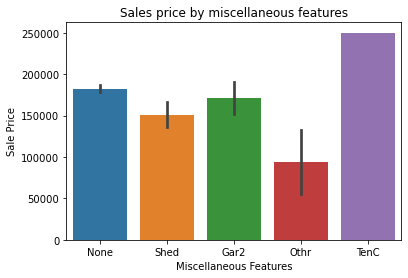

In [231]:
plot1 = sns.barplot(x='MiscFeature', y='SalePrice', data= housing_df3);
plt.xlabel('Miscellaneous Features');
plt.ylabel('Sale Price');
plt.title('Sales price by miscellaneous features');

We can see from the plot that TenC had the highest selling price. It also sheds light that some of the properties had sale prices higher than properties that even had some miscellaneous features (shed, Gar2, others) 

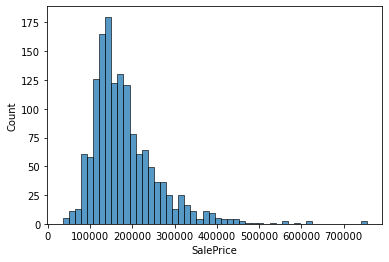

In [232]:
plot2=sns.histplot(x='SalePrice', data= housing_df3, bins=50)

Above histogram shows us the distribution of sale price in our data set which says our data is right skewed with the lowest sale price lesser than 50000  and  highest  more  than 750,000 dollars. 


Also, our mean selling price falls at 180,000 dollars approximately with standard deviation of 80000 dollars. 

Most of the sale prices lies between 120,000 to 180,000.


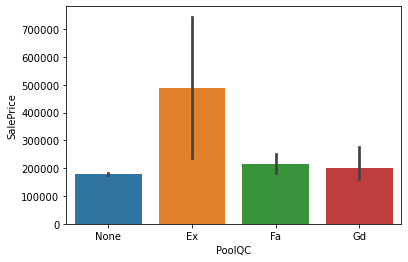

In [233]:
plot3= sns.barplot(x='PoolQC', y='SalePrice',data=housing_df3)

This shows that Ex type PoolQC had highest sale price whereas others had approximately similar

In [234]:
#grouping the data on basis of different neighborhoods to see the column features difference
housing_df4=housing_df3.groupby('Neighborhood').sum().reset_index()
housing_df4

,Neighborhood,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,Blmngtn,1940,660.0,57769,122,85,34089,34098,775.0,3332.0,...,2504,264,0,0,144,0,0,97,34127,3312805.0
1,Blueste,320,48.0,3250,12,12,3960,3960,0.0,366.0,...,311,0,0,0,0,0,0,12,4017,275000.0
2,BrDale,2560,345.0,28816,91,87,31543,31578,4921.0,4007.0,...,1092,128,0,0,0,0,0,93,32123,1671900.0
3,BrkSide,2885,2933.0,426904,293,356,112023,114178,429.0,11353.0,...,2079,1470,2311,144,1212,0,2070,360,116445,7240375.0
4,ClearCr,1470,1085.0,864521,165,159,55064,55545,2368.0,17385.0,...,5287,1815,911,130,978,0,900,190,56218,5951832.0
5,CollgCr,6495,9032.0,1442872,996,786,299683,299871,14584.0,68488.0,...,17148,7758,34,389,645,0,2450,921,301171,29694866.0
6,Crawfor,2970,2944.0,602294,320,336,99019,100939,4137.0,23807.0,...,2681,1377,2355,551,1539,0,2500,350,102382,10741861.0
7,Edwards,5680,6276.0,1021865,508,544,195597,197511,5047.0,42446.0,...,7077,3324,2638,180,1525,1218,1600,575,200794,12821970.0
8,Gilbert,4600,3914.0,898953,518,405,157862,157907,3280.0,16908.0,...,8123,3368,0,867,291,0,1680,521,158597,15235506.0
9,IDOTRR,1985,2125.0,300039,176,205,71334,72682,600.0,5302.0,...,739,1437,3069,0,310,0,4114,229,74287,3704580.0


In [235]:
#Filtering the data set to see differences in sale prices for neighborhoods. 
housing_df5= housing_df4.filter(['Neighborhood','SalePrice'], axis=1)


housing_df5

,Neighborhood,SalePrice
0,Blmngtn,3312805.0
1,Blueste,275000.0
2,BrDale,1671900.0
3,BrkSide,7240375.0
4,ClearCr,5951832.0
5,CollgCr,29694866.0
6,Crawfor,10741861.0
7,Edwards,12821970.0
8,Gilbert,15235506.0
9,IDOTRR,3704580.0


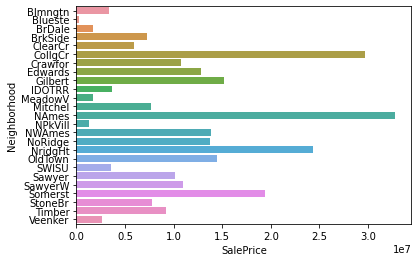

In [236]:
plot4= sns.barplot(x= 'SalePrice', y= 'Neighborhood', data=housing_df5)

We can see that NAmes (32815593.0) had the highest total sale price in our data whereas Blueste (275000.0) had the lowest.

TOP 5 most expensive neighborhoods are- 
1. NAmes
2. CollgCr
3. NridgHt
4. SomerSt
5. Gilbert

Lowest 5 least expensive neighborhoods are- 
1. Blueste
2. NPkVill
3. BrDale
4. MeadowV
5. Veenker



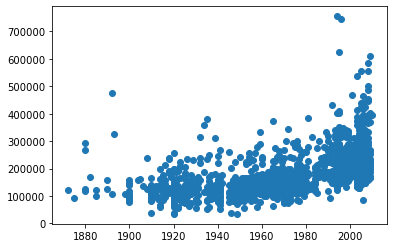

In [237]:
plt.scatter(housing_df3['YearBuilt'],housing_df3['SalePrice'])
plt.show()

We can see from the above scatterplot that we have an positive and increasing line wherein our sale price is poisitively impacted by the year built. This means the recent the house was built, more was its sale price which is true in general sense. 

# Dealing with Numeric Variables-

In [238]:
numeric_features = housing_df3.select_dtypes(include=[np.number])
numeric_features.dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice        float64
dtype: object

In [239]:
Numeric_data = housing_df3.select_dtypes(exclude=["object"])

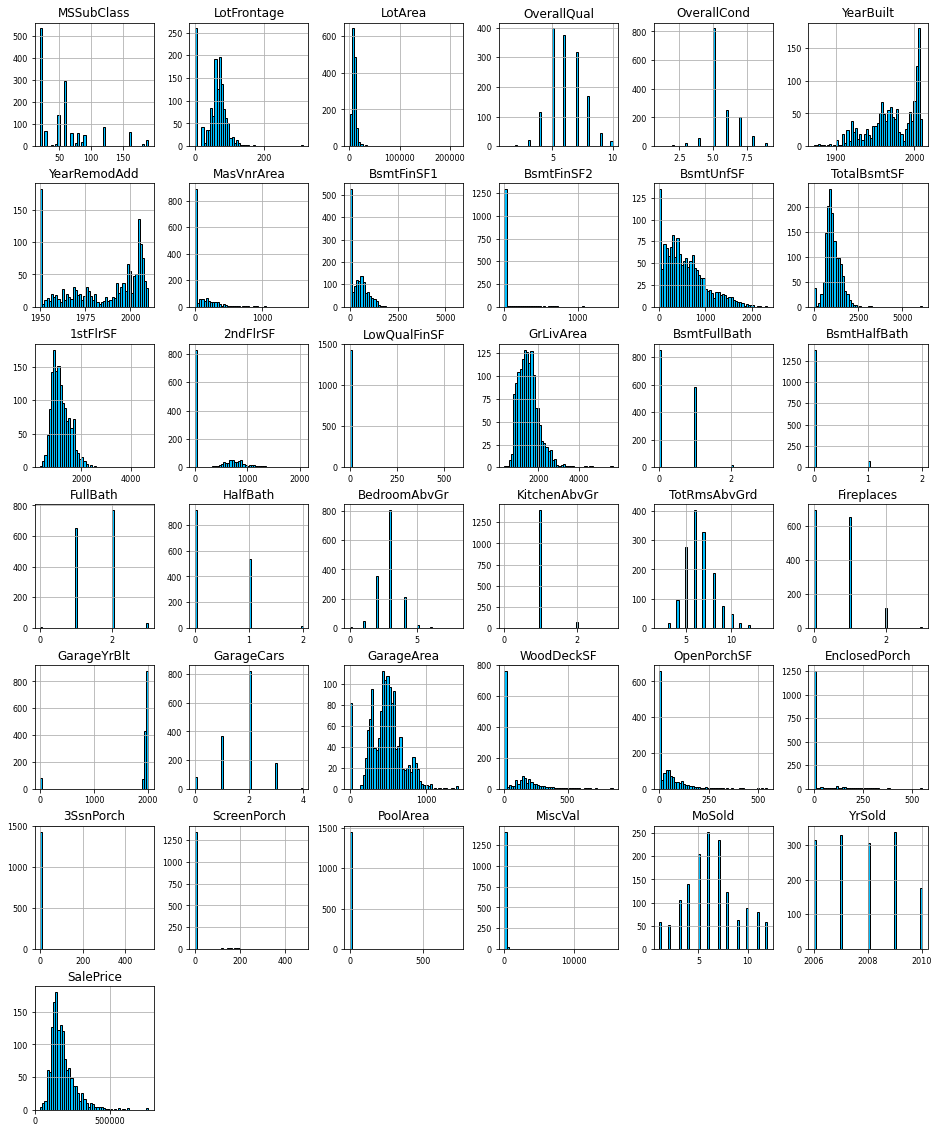

In [240]:
#checking distributions of all numeric data
plot=Numeric_data.hist(figsize=(16, 20), bins=50, color="deepskyblue",
                         edgecolor="black", xlabelsize=8, ylabelsize=8)



In [241]:
numeric_corr = Numeric_data.corr()["SalePrice"][:-1]

# Correlated features where correlation>0.5
high_corr_feat = numeric_corr[abs(
    numeric_corr) >= 0.5].sort_values(ascending=False)
print(
    f"{len(high_corr_feat)} Highly correlated features with SalePrice:\n{high_corr_feat}\n")

# Correlated features where correlation between 0.3 to 0.5
low_corr_feat = numeric_corr[(abs(numeric_corr) < 0.5) & (
    abs(numeric_corr) >= 0.3)].sort_values(ascending=False)
print(
    f"{len(low_corr_feat)} low correlated features with SalePrice:\n{low_corr_feat}")

10 Highly correlated features with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

6 low correlated features with SalePrice:
MasVnrArea     0.472614
Fireplaces     0.466929
BsmtFinSF1     0.386420
WoodDeckSF     0.324413
2ndFlrSF       0.319334
OpenPorchSF    0.315856
Name: SalePrice, dtype: float64


since our target variable (response column) is sales price, we are studying the correlation of numeric variables with it so that we can check whether particular columns impacts the sales prices or not. If not, we will drop the extra column that are unnecessary for deriving predictions. 


I made a filter of correlations where variables with correlation higher than 0.5 with Sale price are highly correlated features and those between 0.3 to 0.5 as low correlated features. 
 
I am keeping strong correlated features only (i.e correlation>=0.5) as they are useful in predicting sales price. 

In [212]:
strong_features = numeric_corr[abs(numeric_corr) >= 0.5].index.tolist()
strong_features.append("SalePrice")

In [213]:
#combining correlated features 
list_of_numerical_features = strong_features[:-1] 

In [214]:
list_of_numerical_features

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea']

In [242]:
numeric_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [243]:
housing_df3.drop(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'BsmtFinSF2','BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr','KitchenAbvGr','GarageYrBlt','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold', 'YrSold','MasVnrArea','Fireplaces','BsmtFinSF1','WoodDeckSF','2ndFlrSF','OpenPorchSF'], axis=1, inplace=True)

In [244]:
housing_df3.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

# Studying Highly Correlated feature-

Overall quality is the integer values from 1 to 10 from the dataset. 

In [245]:
quality_pivot = housing_df3.pivot_table(index='OverallQual',
                  values='SalePrice', aggfunc=np.median)

In [246]:
quality_pivot

,SalePrice
OverallQual,
1,50150.0
2,60000.0
3,86250.0
4,108000.0
5,133000.0
6,160000.0
7,200141.0
8,269750.0
9,345000.0


This pivot table will give us the median sale prices based on overall unique qualities in dataset. 

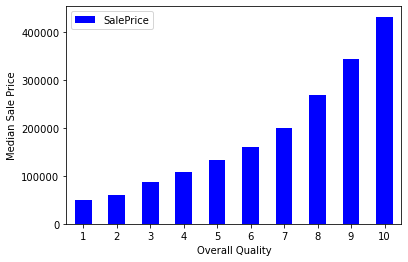

In [88]:
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

SaLE PRICES increase as the overall quality increases. 

# Dealing with Categorical Variables-

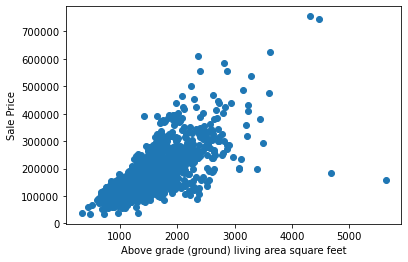

In [247]:
#studying the relationship between living area and sale prices
plt.scatter(x=housing_df3['GrLivArea'], y=housing_df3['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

We can see that as the living area increases, the sale price tends to increase too. We can state, this variable does bring an impact

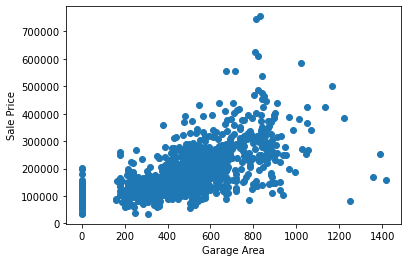

In [248]:
#studying the relationship between garrage and sales prices
plt.scatter(x=housing_df3['GarageArea'], y=housing_df3['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()


From the above plot we can see that there are various properties which have 0's which means they do not have garrage. Also, I can notice there are some outliers in garrage column. We will be removing the outliers because it impacts our regression model.

In [252]:
#removing outliers from the data by keeping a filter to keep the values lesser than 1200 (with reference to thew above plot)
housing_df6 = housing_df3[housing_df3['GarageArea'] < 1200]

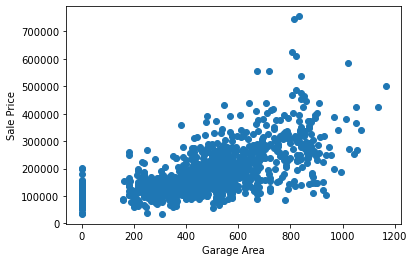

In [253]:
plt.scatter(x=housing_df6['GarageArea'], y=housing_df6['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

We can see that we successfully got rid of outliers.

In [254]:
categoricals = housing_df6.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,...,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455
unique,5,2,3,4,4,2,5,3,25,9,...,7,4,6,6,3,4,5,5,9,6
top,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal
freq,1147,1450,1364,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,1449,1174,1402,1266,1196


From this, we can see what levels exists in the non numeric data.
Count gives the count of non null values in column. Unique tells the unique levels in column. Top shows the most occurring level in column. Finally, frequency gives the count of top most occurring level. 

For many of these columns, we will do encoding to convert categorical data into numeric data which would be required to study the pattern about which property falls under which category and which does not. Basicaaly, this is way of doing machine learning classification. 

In [255]:
#checking the value counts of levels in street column
print (housing_df6.Street.value_counts(), "\n")

Pave    1450
Grvl       5
Name: Street, dtype: int64 



only 5 values with Grvl is shown. We will encode this column so as to convert the column into numeric values of 0's and 1's (we can also say boolean) that would be used for regression. I will perform this step while mass label encoding

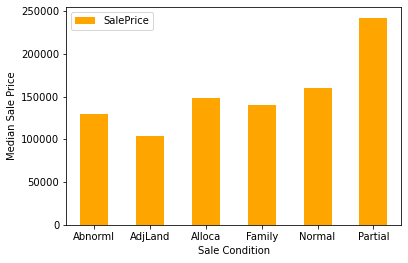

In [256]:
#studying the relation between sale condition and sale prices
saleCond_pivot = housing_df6.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
saleCond_pivot.plot(kind='bar', color='orange')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

We can see that partial-sale condition had the highest median sale prices while rest had almost similar. So we will convert the sale condition into binary variable wqith 1 being the partial and 0 being rest of the types. 

In [257]:
def binary(x):
    return 1 if x == 'Partial' else 0
housing_df6['Conv_saleCondition'] = housing_df6.SaleCondition.apply(binary)


/var/folders/xx/5d2tpx8j1rj_18ksbxgx9c400000gn/T/ipykernel_11113/2710435179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df6['Conv_saleCondition'] = housing_df6.SaleCondition.apply(binary)


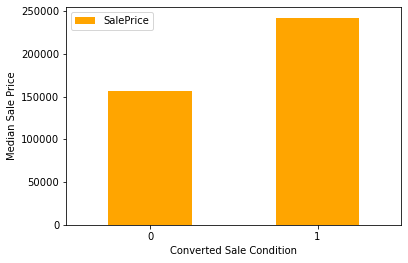

In [258]:
condition_pivot = housing_df6.pivot_table(index='Conv_saleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='orange')
plt.xlabel('Converted Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

We can see that we have converted sale conditions column into binary for our linear model

In [259]:
#Dropping some of the variables as they contain NA values which will make our linear model less relevant and might overfit. 
housing_df7=housing_df6
housing_df7.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType'], axis=1, inplace=True)




/Users/swati/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [267]:
#removing variables because not useful for linear model
housing_df7.drop(['LotShape', 'Condition1', 'Condition2', 'RoofMatl', 'Exterior1st', 'Exterior2nd','Heating', 'HeatingQC','Electrical','SaleType'], axis=1, inplace=True)

/Users/swati/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Removed the above columns because of alot of uniqueness factor. Also, heatingqc and heating, central are reduntant columns, so kept central and removed rest.

In [268]:
housing_df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 1 to 1460
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSZoning            1455 non-null   int64  
 1   Street              1455 non-null   int64  
 2   LandContour         1455 non-null   int64  
 3   Utilities           1455 non-null   int64  
 4   LotConfig           1455 non-null   int64  
 5   LandSlope           1455 non-null   int64  
 6   Neighborhood        1455 non-null   int64  
 7   BldgType            1455 non-null   int64  
 8   HouseStyle          1455 non-null   int64  
 9   OverallQual         1455 non-null   int64  
 10  YearBuilt           1455 non-null   int64  
 11  YearRemodAdd        1455 non-null   int64  
 12  RoofStyle           1455 non-null   int64  
 13  ExterQual           1455 non-null   int64  
 14  ExterCond           1455 non-null   int64  
 15  Foundation          1455 non-null   int64  
 16  BsmtQu

# Model Preparation

In [269]:
#using laber encoder which means to convert the categorical variables into binary variable to use it for regression model and machine learning models
from sklearn.preprocessing import LabelEncoder

In [270]:
#mass label encoding on categorical variables to convert into numeric variables on the 
#basis of priority of pattern in our dataset which is necessary for linear modeling-

label_encoder = LabelEncoder()

housing_df7['MSZoning'] = label_encoder.fit_transform(housing_df7['MSZoning'])
housing_df7['LandContour'] = label_encoder.fit_transform(housing_df7['LandContour'])
housing_df7['Utilities'] = label_encoder.fit_transform(housing_df7['Utilities'])
housing_df7['LotConfig'] = label_encoder.fit_transform(housing_df7['LotConfig'])
housing_df7['LandSlope'] = label_encoder.fit_transform(housing_df7['LandSlope'])
housing_df7['Neighborhood'] = label_encoder.fit_transform(housing_df7['Neighborhood'])
housing_df7['BldgType'] = label_encoder.fit_transform(housing_df7['BldgType'])
housing_df7['HouseStyle'] = label_encoder.fit_transform(housing_df7['HouseStyle'])
housing_df7['RoofStyle'] = label_encoder.fit_transform(housing_df7['RoofStyle'])
housing_df7['ExterQual'] = label_encoder.fit_transform(housing_df7['ExterQual'])
housing_df7['ExterCond'] = label_encoder.fit_transform(housing_df7['ExterCond'])
housing_df7['Foundation'] = label_encoder.fit_transform(housing_df7['Foundation'])
housing_df7['BsmtQual'] = label_encoder.fit_transform(housing_df7['BsmtQual'])
housing_df7['BsmtCond'] = label_encoder.fit_transform(housing_df7['BsmtCond'])
housing_df7['BsmtExposure'] = label_encoder.fit_transform(housing_df7['BsmtExposure'])
housing_df7['BsmtFinType1'] = label_encoder.fit_transform(housing_df7['BsmtFinType1'])
housing_df7['BsmtFinType2'] = label_encoder.fit_transform(housing_df7['BsmtFinType2'])
housing_df7['CentralAir'] = label_encoder.fit_transform(housing_df7['CentralAir'])
housing_df7['KitchenQual'] = label_encoder.fit_transform(housing_df7['KitchenQual'])
housing_df7['Functional'] = label_encoder.fit_transform(housing_df7['Functional'])
housing_df7['GarageType'] = label_encoder.fit_transform(housing_df7['GarageType'])
housing_df7['GarageFinish'] = label_encoder.fit_transform(housing_df7['GarageFinish'])
housing_df7['GarageQual'] = label_encoder.fit_transform(housing_df7['GarageQual'])
housing_df7['GarageCond'] = label_encoder.fit_transform(housing_df7['GarageCond'])
housing_df7['PavedDrive'] = label_encoder.fit_transform(housing_df7['PavedDrive'])
housing_df7['SaleType'] = label_encoder.fit_transform(housing_df7['SaleType'])
housing_df7['Street'] = label_encoder.fit_transform(housing_df7['Street'])

/var/folders/xx/5d2tpx8j1rj_18ksbxgx9c400000gn/T/ipykernel_11113/155300.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df7['MSZoning'] = label_encoder.fit_transform(housing_df7['MSZoning'])
/var/folders/xx/5d2tpx8j1rj_18ksbxgx9c400000gn/T/ipykernel_11113/155300.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df7['LandContour'] = label_encoder.fit_transform(housing_df7['LandContour'])
/var/folders/xx/5d2tpx8j1rj_18ksbxgx9c400000gn/T/ipykernel_11113/155300.py:8: SettingWithCopyWarning

KeyError: 'SaleType'

In [271]:
housing_df7.head()

,MSZoning,Street,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleCondition,SalePrice,Conv_saleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,3,1,3,0,4,0,5,0,5,7,...,1,2,2.0,548.0,5,5,2,Normal,208500.0,0
2,3,1,3,0,2,0,24,0,2,6,...,1,2,2.0,460.0,5,5,2,Normal,181500.0,0
3,3,1,3,0,4,0,5,0,5,7,...,1,2,2.0,608.0,5,5,2,Normal,223500.0,0
4,3,1,3,0,0,0,6,0,5,7,...,5,3,3.0,642.0,5,5,2,Abnorml,140000.0,0
5,3,1,3,0,2,0,15,0,5,8,...,1,2,3.0,836.0,5,5,2,Normal,250000.0,0


In [272]:
housing_df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 1 to 1460
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSZoning            1455 non-null   int64  
 1   Street              1455 non-null   int64  
 2   LandContour         1455 non-null   int64  
 3   Utilities           1455 non-null   int64  
 4   LotConfig           1455 non-null   int64  
 5   LandSlope           1455 non-null   int64  
 6   Neighborhood        1455 non-null   int64  
 7   BldgType            1455 non-null   int64  
 8   HouseStyle          1455 non-null   int64  
 9   OverallQual         1455 non-null   int64  
 10  YearBuilt           1455 non-null   int64  
 11  YearRemodAdd        1455 non-null   int64  
 12  RoofStyle           1455 non-null   int64  
 13  ExterQual           1455 non-null   int64  
 14  ExterCond           1455 non-null   int64  
 15  Foundation          1455 non-null   int64  
 16  BsmtQu

In [273]:
#Using Correlation to determine useful and useless variables
X = housing_df7.drop('SalePrice', axis=1)
y = housing_df7['SalePrice']

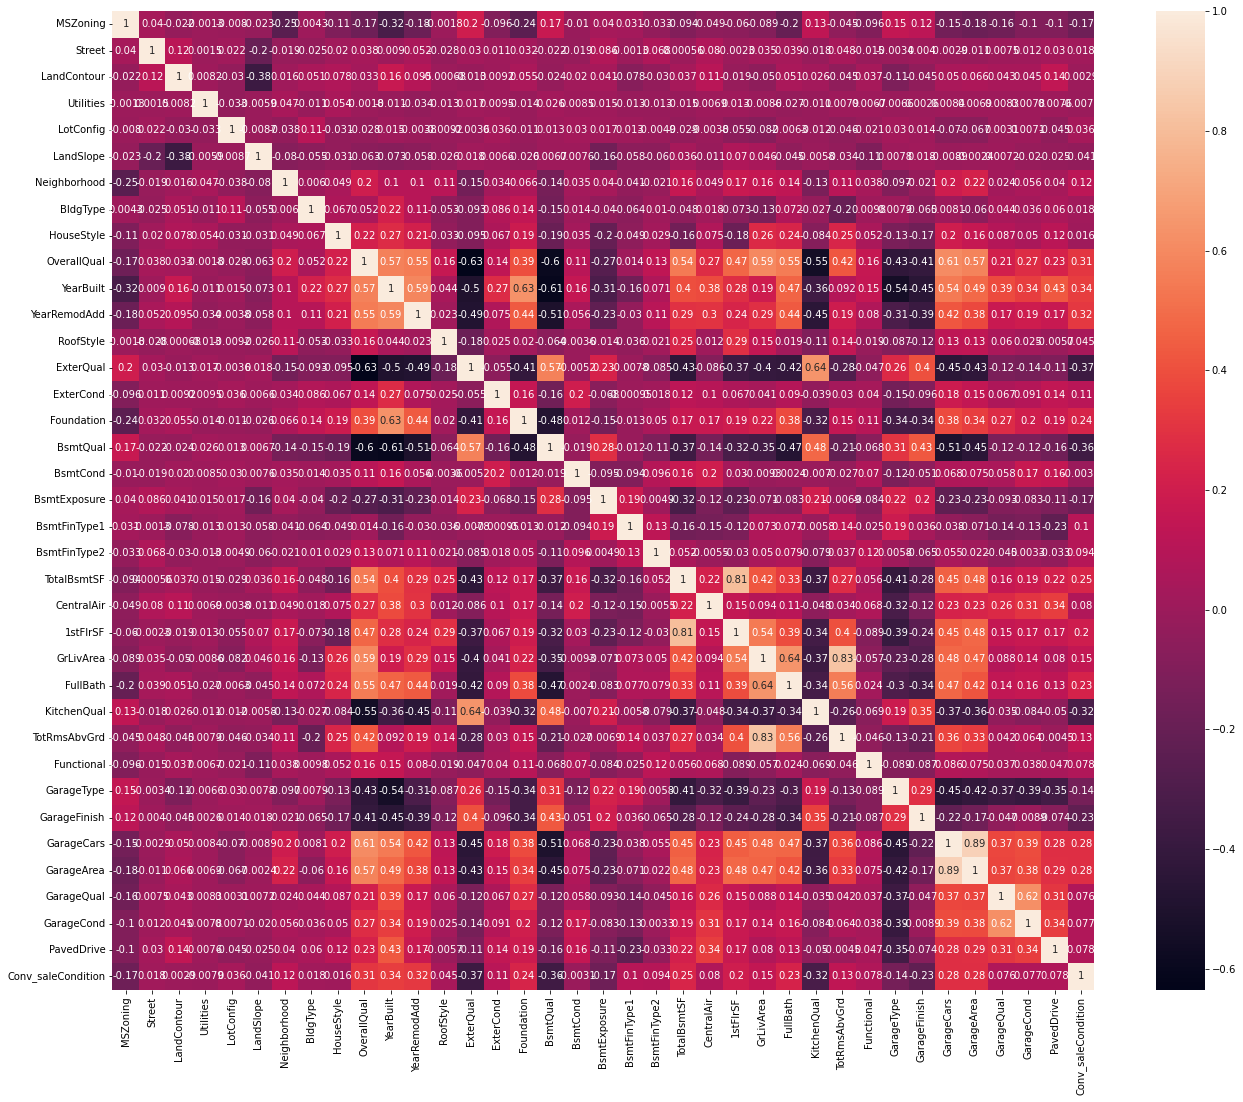

In [274]:
plt.figure(figsize=(22,18))
ax = sns.heatmap(X.corr(), annot=True)
plt.show()

The above heatmap might be difficult to read as there exists a lot of variables in the dataset. So I am going to apply a function to fetch the correlated features

In [275]:
#making a function to check correlation
def correlation(dataset, threshold):
    correlated_Columns = set()  
    corr_heatmap = dataset.corr() 
    for i in range(len(corr_heatmap.columns)): 
        for j in range(i):
            if abs(corr_heatmap.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_heatmap.columns[i]  # fetch names of columns
                correlated_Columns.add(colname)
    return correlated_Columns

In [276]:
#checking set of features which are highly correlated to one another which will make our model less relevant or make it overfit
correlated_features = correlation(X, 0.64)
len(set(correlated_features))

3

In [277]:
correlated_features

{'1stFlrSF', 'GarageArea', 'TotRmsAbvGrd'}

In [278]:
#making a dataframe without non correlated columns (overfitting reason)
X_corr = X.drop(correlated_features,axis=1)
X_corr

,MSZoning,Street,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,...,KitchenQual,Functional,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,SaleCondition,Conv_saleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,3,1,3,0,4,0,5,0,5,7,...,2,6,1,2,2.0,5,5,2,Normal,0
2,3,1,3,0,2,0,24,0,2,6,...,3,6,1,2,2.0,5,5,2,Normal,0
3,3,1,3,0,4,0,5,0,5,7,...,2,6,1,2,2.0,5,5,2,Normal,0
4,3,1,3,0,0,0,6,0,5,7,...,2,6,5,3,3.0,5,5,2,Abnorml,0
5,3,1,3,0,2,0,15,0,5,8,...,2,6,1,2,3.0,5,5,2,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,3,1,3,0,4,0,8,0,5,6,...,3,6,1,2,2.0,5,5,2,Normal,0
1457,3,1,3,0,4,0,14,0,2,6,...,3,2,1,3,2.0,5,5,2,Normal,0
1458,3,1,3,0,4,0,6,0,5,7,...,2,6,1,2,1.0,5,5,2,Normal,0


We tried to study the correlation of variables with one another. Some of the variables are correlated with one another. So, removing any one from the pairs of correlated features because it will make model less reliable

In [279]:
X_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 1 to 1460
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSZoning            1455 non-null   int64  
 1   Street              1455 non-null   int64  
 2   LandContour         1455 non-null   int64  
 3   Utilities           1455 non-null   int64  
 4   LotConfig           1455 non-null   int64  
 5   LandSlope           1455 non-null   int64  
 6   Neighborhood        1455 non-null   int64  
 7   BldgType            1455 non-null   int64  
 8   HouseStyle          1455 non-null   int64  
 9   OverallQual         1455 non-null   int64  
 10  YearBuilt           1455 non-null   int64  
 11  YearRemodAdd        1455 non-null   int64  
 12  RoofStyle           1455 non-null   int64  
 13  ExterQual           1455 non-null   int64  
 14  ExterCond           1455 non-null   int64  
 15  Foundation          1455 non-null   int64  
 16  BsmtQu

In [280]:
X_corr.columns

Index(['MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'TotalBsmtSF', 'CentralAir', 'GrLivArea', 'FullBath',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'SaleCondition',
       'Conv_saleCondition'],
      dtype='object')

# Data Partitioning

In [281]:
housing_df7.head()

,MSZoning,Street,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleCondition,SalePrice,Conv_saleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,3,1,3,0,4,0,5,0,5,7,...,1,2,2.0,548.0,5,5,2,Normal,208500.0,0
2,3,1,3,0,2,0,24,0,2,6,...,1,2,2.0,460.0,5,5,2,Normal,181500.0,0
3,3,1,3,0,4,0,5,0,5,7,...,1,2,2.0,608.0,5,5,2,Normal,223500.0,0
4,3,1,3,0,0,0,6,0,5,7,...,5,3,3.0,642.0,5,5,2,Abnorml,140000.0,0
5,3,1,3,0,2,0,15,0,5,8,...,1,2,3.0,836.0,5,5,2,Normal,250000.0,0


In [399]:
#performing data partition using sklearn
#using columns from x_corr as we are not using the columns which are highly correlated with one another
from sklearn.model_selection import train_test_split
X=housing_df7[['MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'TotalBsmtSF', 'CentralAir', 'GrLivArea', 'FullBath',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive',
       'Conv_saleCondition']] 
y=housing_df7['SalePrice']
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.4, random_state=9697)

In [400]:
X_train_r.shape

(873, 34)

I have split my dataset into 60-40 ratio of train and test respectively. Splitting the data is an essential factor because we build our model based on training set so that we can measure our findings based on our test (validation) data. This helps to check if our model is overfitting or meeting the satisfactory error rate. 


In [330]:
#normalizing our data with the help of z-scores
import scipy.stats as stats
housing_df8=stats.zscore(housing_df7)
housing_df8

,MSZoning,Street,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,...,Functional,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SalePrice,Conv_saleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.049258,0.058722,0.312294,-0.026225,0.605038,-0.224523,-1.205180,-0.411946,1.024928,0.658292,...,0.256446,-0.770344,0.100475,0.318740,0.374592,0.316198,0.2959,0.290284,0.349002,-0.302527
2,-0.049258,0.058722,0.312294,-0.026225,-0.627917,-0.224523,1.951950,-0.411946,-0.543729,-0.070084,...,0.256446,-0.770344,0.100475,0.318740,-0.048282,0.316198,0.2959,0.290284,0.008535,-0.302527
3,-0.049258,0.058722,0.312294,-0.026225,0.605038,-0.224523,-1.205180,-0.411946,1.024928,0.658292,...,0.256446,-0.770344,0.100475,0.318740,0.662915,0.316198,0.2959,0.290284,0.538150,-0.302527
4,-0.049258,0.058722,0.312294,-0.026225,-1.860872,-0.224523,-1.039015,-0.411946,1.024928,0.658292,...,0.256446,1.299555,0.940655,1.662992,0.826298,0.316198,0.2959,0.290284,-0.514775,-0.302527
5,-0.049258,0.058722,0.312294,-0.026225,-0.627917,-0.224523,0.456468,-0.411946,1.024928,1.386668,...,0.256446,-0.770344,0.100475,1.662992,1.758542,0.316198,0.2959,0.290284,0.872312,-0.302527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,-0.049258,0.058722,0.312294,-0.026225,0.605038,-0.224523,-0.706685,-0.411946,1.024928,-0.070084,...,0.256446,-0.770344,0.100475,0.318740,-0.048282,0.316198,0.2959,0.290284,-0.073429,-0.302527
1457,-0.049258,0.058722,0.312294,-0.026225,0.605038,-0.224523,0.290303,-0.411946,-0.543729,-0.070084,...,-3.821465,-0.770344,0.940655,0.318740,0.143934,0.316198,0.2959,0.290284,0.367917,-0.302527
1458,-0.049258,0.058722,0.312294,-0.026225,0.605038,-0.224523,-1.039015,-0.411946,1.024928,0.658292,...,0.256446,-0.770344,0.100475,-1.025512,-1.047801,0.316198,0.2959,0.290284,1.080375,-0.302527


We normalize our data because everything is measured in differert measuring units, so we cannot necessarily make any comparison while comparing two columns such as matching garrage area with 1st floor. So, we normalize the data into significant sclaes of comparison.

Also, converting variables into z-scores is a step in processing clustering. 

# K-means Clustering

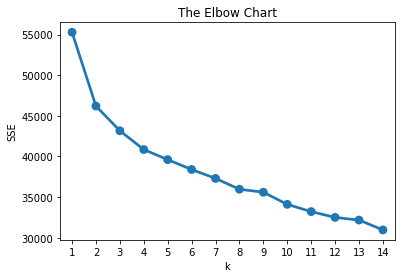

In [331]:
#elbow chart helps to determine optimal k-value in clustering
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 15):    
    kmeans = KMeans(n_clusters=k, random_state=654)
    kmeans.fit(housing_df8)
    sse[k] = kmeans.inertia_
    
plt.title('The Elbow Chart')

plt.xlabel('k')

plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()));

We performed this step to determine how many clusters would be optimal for our dataset. 

This algorithm would make groups in our dataset based on similarities in attribute values by studying the pattern. CLustering is an unsupervisied machine learning. 

In [332]:
kmeans = KMeans(n_clusters=5, random_state=654)
kmeans.fit(housing_df8)
cluster_labels = kmeans.labels_

In [333]:
housing_df8.columns

Index(['MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', 'GrLivArea',
       'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SalePrice', 'Conv_saleCondition'],
      dtype='object')

In [334]:
#performing the k-means algorithm
kmeans2 = housing_df8.assign(Cluster = cluster_labels)
kmeans2.groupby(['Cluster']).agg({
'OverallQual': 'mean', 
'TotalBsmtSF': 'mean', 
'1stFlrSF': 'mean',
'GrLivArea': 'mean',
'FullBath': 'mean',
'TotRmsAbvGrd': 'mean',
'GarageCars': 'mean',    
'GarageArea': 'mean',
'SalePrice': 'mean',
'Conv_saleCondition': ['mean', 'count']
}).round(2) #rounding the z-scores in 2 decimal places

OverallQual TotalBsmtSF 1stFlrSF GrLivArea FullBath TotRmsAbvGrd  \
               mean        mean     mean      mean     mean         mean   
Cluster                                                                    
0             -0.93       -0.72    -0.67     -0.53    -0.58        -0.30   
1             -0.06        0.20     0.75      0.81     0.48         0.76   
2              1.56        1.44     1.36      1.13     0.87         0.90   
3              0.47       -0.01    -0.19      0.09     0.63        -0.04   
4             -0.66       -0.39    -0.47     -0.68    -0.86        -0.54   

        GarageCars GarageArea SalePrice Conv_saleCondition        
              mean       mean      mean               mean count  
Cluster                                                           
0            -1.51      -1.48     -0.90              -0.26   156  
1             0.25       0.26      0.10              -0.29   212  
2             1.31       1.34      1.83               1.02   188  
3             0.40       0.25      0.20               0.14   403  
4            -0.45      -0.35     -0.61              -0.30   496

In [335]:
kmeans2['Cluster'] = kmeans2['Cluster'].astype('category')


In [336]:
more_data = kmeans2.groupby('Cluster')[['SalePrice', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'Conv_saleCondition' ]].mean()
more_data

,SalePrice,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,Conv_saleCondition
Cluster,,,,,,,,,,
0,-0.901806,-0.929195,-0.721388,-0.670281,-0.533996,-0.583312,-0.300544,-1.508064,-1.480779,-0.256271
1,0.099907,-0.059777,0.200567,0.748895,0.812187,0.481449,0.763455,0.248991,0.262278,-0.285509
2,1.827438,1.561014,1.443094,1.355608,1.130344,0.866921,0.901305,1.305478,1.341726,1.021690
3,0.200568,0.472131,-0.013845,-0.191035,0.091200,0.632038,-0.043827,0.402131,0.245252,0.136164
4,-0.614689,-0.657485,-0.394568,-0.467881,-0.681731,-0.864442,-0.537804,-0.453663,-0.354199,-0.295253


<AxesSubplot:xlabel='Cluster', ylabel='SalePrice'>

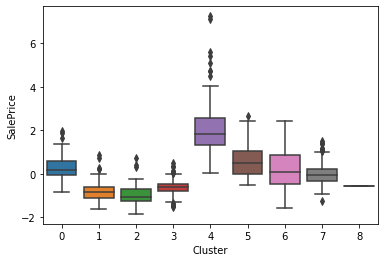

In [127]:
#visualizing boxplots of clusters based on sale prices
sns.boxplot(x='Cluster', y='SalePrice', data=kmeans2)

We can see that cluster 4 has the highest median sales prices whereas cluster 2 and 1 had lowest median sale prices. 

# Linear Regression-1st Model

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

1𝑛∑𝑖=1𝑛|𝑦𝑖−𝑦̂ 𝑖|

Mean Squared Error (MSE) is the mean of the squared errors:

1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)2

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)

Comparing these metrics:

MAE is the easiest to understand, because it's the average error. MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world. RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units. All of these are loss functions, because we want to minimize them.

In [337]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [387]:
model1=lm.fit(X_train_r,y_train_r)
print(lm)

LinearRegression()


In [357]:
print(lm.intercept_)

-329329.07374339935


In [358]:
print(lm.coef_)

[ 1.10099525e+03  2.72771423e+04 -9.20199256e+02 -1.32986315e-08
 -8.55144936e+02  1.38799093e+04  8.72413603e+01 -3.95287658e+03
 -3.79122894e+02  1.12079655e+04  3.42696263e+01  1.25528675e+02
  4.18895138e+03 -9.25914967e+03 -1.30778217e+03  1.33996538e+03
 -7.03426128e+03  8.80654884e+02 -2.92129866e+03 -2.78754449e+03
 -1.47495624e+03  2.78981604e+01  8.96261982e+03  6.52864571e+01
 -8.30622746e+03 -8.64150600e+03  6.59856063e+03  6.13959466e+02
 -1.95837578e+03  9.01487009e+03 -5.41388988e+02  4.36754266e+02
  2.93743124e+03  1.45579035e+04]


In [393]:
#getting the regression equation-
print(lm.intercept_, lm.coef_, lm.score(X_test_r, y_test_r))

-329329.07374339935 [ 1.10099525e+03  2.72771423e+04 -9.20199256e+02 -1.32986315e-08
 -8.55144936e+02  1.38799093e+04  8.72413603e+01 -3.95287658e+03
 -3.79122894e+02  1.12079655e+04  3.42696263e+01  1.25528675e+02
  4.18895138e+03 -9.25914967e+03 -1.30778217e+03  1.33996538e+03
 -7.03426128e+03  8.80654884e+02 -2.92129866e+03 -2.78754449e+03
 -1.47495624e+03  2.78981604e+01  8.96261982e+03  6.52864571e+01
 -8.30622746e+03 -8.64150600e+03  6.59856063e+03  6.13959466e+02
 -1.95837578e+03  9.01487009e+03 -5.41388988e+02  4.36754266e+02
  2.93743124e+03  1.45579035e+04] 0.8022594243308266


Regression Equation-
y=mx+CE

In [359]:
predictions = lm.predict(X_test_r)
predictions= predictions.reshape(-1,1)

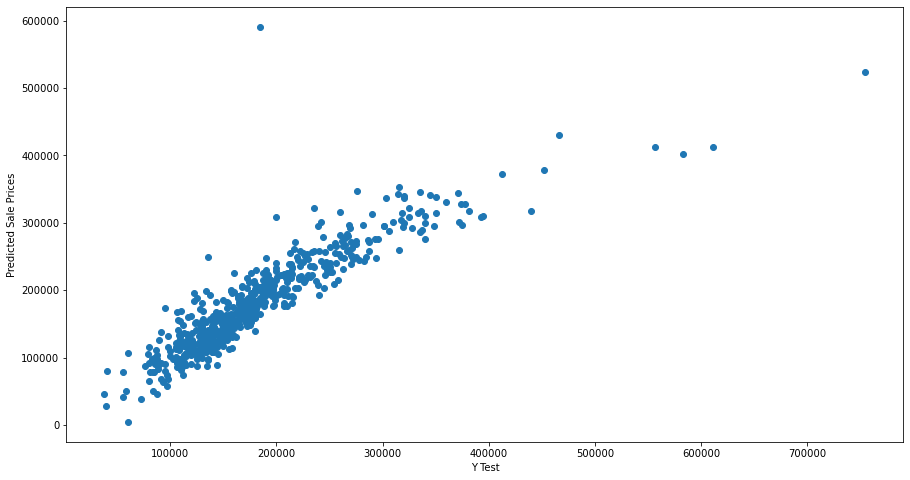

In [360]:
#evaluating performance of our predictions with our test set
plt.figure(figsize=(15,8))
plt.scatter(y_test_r,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Sale Prices')
plt.show()

In [366]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test_r, predictions))
print('MSE:', metrics.mean_squared_error(y_test_r, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_r, predictions)))
print("R2 score =", round(sm.r2_score(y_test_r,predictions),2))

MAE: 21856.86965997673
MSE: 1223726101.2030373
RMSE: 34981.796712047784
R2 score = 0.8


# Random Forest Classifier

In [368]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train_r,y_train_r)

RandomForestClassifier()

In [369]:
#choosing random values for tree split parameters
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 8, 10, 12],
    'max_features': [16, 20, 24],
    'min_samples_leaf': [24, 26, 28, 30, 32]
}

In [370]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier(random_state=9697)

CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_r, y_train_r)

# best hyperparameters
print(CV_rfc.best_params_)

/Users/swati/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


{'max_depth': 4, 'max_features': 16, 'min_samples_leaf': 32, 'n_estimators': 150}


In [372]:
best_rf=RandomForestClassifier(n_estimators=150, max_depth=4, max_features=16, 
                               min_samples_leaf=32, random_state=9697)
best_rf.fit(X_train_r,y_train_r)

RandomForestClassifier(max_depth=4, max_features=16, min_samples_leaf=32,
                       n_estimators=150, random_state=9697)

In [376]:
feature_imp_df = pd.DataFrame(list(zip(best_rf.feature_importances_, X_train_r)))
feature_imp_df.columns = ['feature importance', 'feature']
feature_imp_df = feature_imp_df.sort_values(by='feature importance', ascending=False)
feature_imp_df

,feature importance,feature
23,0.209338,GrLivArea
21,0.118443,TotalBsmtSF
11,0.112417,YearRemodAdd
9,0.098595,OverallQual
10,0.097932,YearBuilt
6,0.051488,Neighborhood
19,0.043968,BsmtFinType1
29,0.042256,GarageCars
27,0.039413,GarageType
24,0.032153,FullBath


GR living area has the highest coefficient which states this is the most important factor in impacting sales prices as per our random forest classifier model. 

Random forest model ranked the variables in a order of highest to lowest importance of input variables that most impacts the target variable (output). This means we find which variable is more important in finding Sales prices on the basis of probabilities. In a random forest, input variables are devided on the basis of branches which means higher probability variables comes on the first branches which is later split into individual branches as per ranking order of other exisiting levels. 

Whereas we have some features which has zero impact on sale prices. Hence we will remove it to build our another Linear regression Model.

Utilities is an important factor in deciding sales prices, even though it has 0 coeffieicnt because it has alot of unique levels which is not considered irrelevant for MLR

In [385]:
predicted_rf = best_rf.predict(X_test_r)

In [394]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error using Random Forest:", mean_absolute_error(y_test_r, predicted_rf))

Mean Absolute Error using Random Forest: 29332.35910652921


# Linear Regression-Model 2

Making another regression model by removing the features that had 0 coefficients in random forest classifier

In [403]:
from sklearn.model_selection import train_test_split
X=housing_df7[['MSZoning', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'TotalBsmtSF', 'CentralAir', 'GrLivArea', 'FullBath',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive',
       'Conv_saleCondition']] 
y=housing_df7['SalePrice']
X_train_r2, X_test_r2, y_train_r2, y_test_r2 = train_test_split(X, y, test_size=0.4, random_state=9697)

In [404]:
clf = LinearRegression()

clf.fit(X_train_r2,y_train_r)

LinearRegression()

In [414]:
clf.score(X_test_r2,y_test_r2)

0.8021160297813706

We are getting 80% accuracy when compared this model against testing set. 

In [418]:
y_pred

array([133134.25168128, 114949.89678016, 153451.23414564, 242024.17312756,
       197446.29485733, 173053.17005067, 157164.37346848, 144385.32222782,
       216842.86667498, 118786.1787355 , 301005.26374626, 116117.00010242,
       300873.34810398,  98168.08425021,  88211.83073482, 204979.53188074,
       138461.16955736, 181976.19117109,  41328.27760023, 206890.61100447,
       259409.7569493 , 135352.28433247, 265401.41947502, 216352.63758768,
       223557.04239161, 246653.21068205, 126802.66198823, 303983.19044075,
       167098.97397933, 192233.8988445 , 108684.12075498, 196051.46631064,
       212575.30479206, 159686.05179237, 105936.14394075, 292543.14022548,
       102029.7754625 , 162129.87159748, 258609.85466414, 118930.54729775,
        65803.62666718,  97644.36986807, 135535.48617777, 185219.7656923 ,
       191652.32807129, 181154.67268848, 140720.60995854, 203635.25016858,
       138827.95437008, 166713.45135024, 336732.93563661, 153880.8195181 ,
       141965.16433187, 2

In [463]:
print('MAE:', metrics.mean_absolute_error(y_test_r2, predictions))
print('MSE:', metrics.mean_squared_error(y_test_r2, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_r2, predictions)))
print("R2 score =", round(sm.r2_score(y_test_r2,predictions),4))

MAE: 21856.86965997673
MSE: 1223726101.2030373
RMSE: 34981.796712047784
R2 score = 0.8023


# Linear Regression-Third Model 

GrLivArea,TotalBsmtSF,OverallQual,Neighborhood have highest coefficient from random forest classifier

In [ ]:
housing_df11=housing_df7
#making a column as age of property by subtracting current year by year built
#another col as Age_renovation whiich comes by subtracting yearRemodAdd and current year
housing_df11['Age']=2022-housing_df11['YearBuilt']
housing_df11['Age_renovation']=2022-housing_df11['YearRemodAdd']

In [489]:
housing_df11.drop(['YearBuilt','YearRemodAdd'], axis=1, inplace=True)

/Users/swati/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


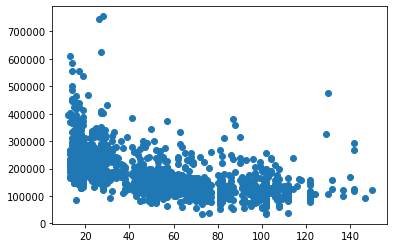

In [495]:
plt.scatter(housing_df11['Age'],housing_df11['SalePrice'])
plt.show()

We can see sale price reduces when the age of property increases

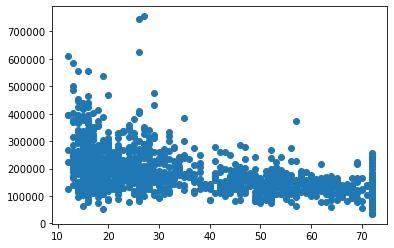

In [497]:
plt.scatter(housing_df11['Age_renovation'],housing_df11['SalePrice'])
plt.show()

We can see sale price reduces when the renovation age of property increases

In [490]:
housing_df11

,MSZoning,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,RoofStyle,ExterQual,ExterCond,Foundation,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,SalePrice,Conv_saleCondition,Age,Age_renovation
Id,,,,,,,,,,,,,,,,,,,,,
1,3,4,5,0,5,7,1,2,4,2,...,1,2,2.0,5,5,2,208500.0,0,19,19
2,3,2,24,0,2,6,1,3,4,1,...,1,2,2.0,5,5,2,181500.0,0,46,46
3,3,4,5,0,5,7,1,2,4,2,...,1,2,2.0,5,5,2,223500.0,0,21,20
4,3,0,6,0,5,7,1,3,4,0,...,5,3,3.0,5,5,2,140000.0,0,107,52
5,3,2,15,0,5,8,1,2,4,2,...,1,2,3.0,5,5,2,250000.0,0,22,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,3,4,8,0,5,6,1,3,4,2,...,1,2,2.0,5,5,2,175000.0,0,23,22
1457,3,4,14,0,2,6,1,3,4,1,...,1,3,2.0,5,5,2,210000.0,0,44,34
1458,3,4,6,0,5,7,1,0,2,4,...,1,2,1.0,5,5,2,266500.0,0,81,16


In [492]:
from sklearn.model_selection import train_test_split
X=housing_df11[['GrLivArea','TotalBsmtSF', 'OverallQual', 'Neighborhood','Age']] 
y=housing_df11['SalePrice']
X_train_r3, X_test_r3, y_train_r3, y_test_r3 = train_test_split(X, y, test_size=0.4, random_state=9697)

In [493]:
X_train_r3

,GrLivArea,TotalBsmtSF,OverallQual,Neighborhood,Age
Id,,,,,
1290,1970,1085.0,8,16,16
667,2380,1021.0,6,12,57
1310,1294,1278.0,6,20,31
127,958,1078.0,6,13,46
513,864,864.0,5,12,64
...,...,...,...,...,...
1108,2021,868.0,7,8,16
712,1178,859.0,4,9,122
922,2200,1272.0,5,7,122


In [494]:
housing_df11.columns

Index(['MSZoning', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle',
       'OverallQual', 'RoofStyle', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'TotalBsmtSF', 'CentralAir', 'GrLivArea', 'FullBath', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SalePrice', 'Conv_saleCondition', 'Age',
       'Age_renovation'],
      dtype='object')

In [499]:
lm = LinearRegression()

In [500]:
model3=lm.fit(X_train_r3,y_train_r3)
print(lm)

LinearRegression()


In [501]:
predictions = lm.predict(X_test_r3)
predictions= predictions.reshape(-1,1)

In [502]:
print('MAE:', metrics.mean_absolute_error(y_test_r3, predictions))
print('MSE:', metrics.mean_squared_error(y_test_r3, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_r3, predictions)))
print("R2 score =", round(sm.r2_score(y_test_r3,predictions),2))

MAE: 24925.26321630966
MSE: 1513596164.2792828
RMSE: 38904.9632345191
R2 score = 0.76


From R squared and RMSE we can say that model 2 perfomed better.

# Linear Regression- model 4

In [503]:
housing_df11

,MSZoning,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,RoofStyle,ExterQual,ExterCond,Foundation,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,SalePrice,Conv_saleCondition,Age,Age_renovation
Id,,,,,,,,,,,,,,,,,,,,,
1,3,4,5,0,5,7,1,2,4,2,...,1,2,2.0,5,5,2,208500.0,0,19,19
2,3,2,24,0,2,6,1,3,4,1,...,1,2,2.0,5,5,2,181500.0,0,46,46
3,3,4,5,0,5,7,1,2,4,2,...,1,2,2.0,5,5,2,223500.0,0,21,20
4,3,0,6,0,5,7,1,3,4,0,...,5,3,3.0,5,5,2,140000.0,0,107,52
5,3,2,15,0,5,8,1,2,4,2,...,1,2,3.0,5,5,2,250000.0,0,22,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,3,4,8,0,5,6,1,3,4,2,...,1,2,2.0,5,5,2,175000.0,0,23,22
1457,3,4,14,0,2,6,1,3,4,1,...,1,3,2.0,5,5,2,210000.0,0,44,34
1458,3,4,6,0,5,7,1,0,2,4,...,1,2,1.0,5,5,2,266500.0,0,81,16


In [507]:
#making new features by-
#summing exterior quality and exterior condition as total exterior score
#summing garrage qual, garrage finish, garrage type and garrage cond as total garrage score
#summing basement qual, condition, finish type1, finish type 2 as total basement score
housing_df11["ExteriorTotScore"] = (housing_df11.ExterQual) + housing_df11.ExterCond
housing_df11["GarrageTotScore"] = (housing_df11.GarageQual) + housing_df11.GarageCond + (housing_df11.GarageType) + housing_df11.GarageFinish
housing_df11["BasementTotScore"] = (housing_df11.BsmtQual) + housing_df11.BsmtCond + housing_df11.BsmtFinType1 + housing_df11.BsmtFinType2

/var/folders/xx/5d2tpx8j1rj_18ksbxgx9c400000gn/T/ipykernel_11113/740910258.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df11["ExteriorTotScore"] = (housing_df11.ExterQual) + housing_df11.ExterCond
/var/folders/xx/5d2tpx8j1rj_18ksbxgx9c400000gn/T/ipykernel_11113/740910258.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df11["GarrageTotScore"] = (housing_df11.GarageQual) + housing_df11.GarageCond + (housing_df11.GarageType) + housing_df11.GarageFinish
/var/folders/xx/5d2tpx8j1rj_18k

In [510]:
#Removing variables because made new features from it
housing_df11.drop(['ExterQual','ExterCond','GarageQual','GarageCond','GarageType', 'GarageFinish', 'BsmtQual', 'BsmtCond','BsmtFinType1','BsmtFinType2'], axis=1, inplace=True)

/Users/swati/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [515]:
housing_df11.columns

Index(['MSZoning', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle',
       'OverallQual', 'RoofStyle', 'Foundation', 'BsmtExposure', 'TotalBsmtSF',
       'CentralAir', 'GrLivArea', 'FullBath', 'KitchenQual', 'Functional',
       'GarageCars', 'PavedDrive', 'SalePrice', 'Conv_saleCondition', 'Age',
       'Age_renovation', 'ExteriorTotScore', 'GarrageTotScore',
       'BasementTotScore'],
      dtype='object')

In [517]:
#Data Partitioning
from sklearn.model_selection import train_test_split
X=housing_df11[['MSZoning', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle',
       'OverallQual', 'RoofStyle', 'Foundation', 'BsmtExposure', 'TotalBsmtSF',
       'CentralAir', 'GrLivArea', 'FullBath', 'KitchenQual', 'Functional',
       'GarageCars', 'PavedDrive' , 'Conv_saleCondition', 'Age',
       'Age_renovation', 'ExteriorTotScore', 'GarrageTotScore',
       'BasementTotScore']] 
y=housing_df11['SalePrice']
X_train_r4, X_test_r4, y_train_r4, y_test_r4 = train_test_split(X, y, test_size=0.4, random_state=9697)

In [519]:
lm = LinearRegression()

In [521]:
model4=lm.fit(X_train_r4,y_train_r4)
print(lm)

LinearRegression()


In [523]:
predictions = lm.predict(X_test_r4)
predictions= predictions.reshape(-1,1)

In [526]:
print('MAE:', metrics.mean_absolute_error(y_test_r4, predictions))
print('MSE:', metrics.mean_squared_error(y_test_r4, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_r4, predictions)))
print("R2 score =", round(sm.r2_score(y_test_r4,predictions),6))

MAE: 21854.754012963822
MSE: 1255751458.6561987
RMSE: 35436.58361998513
R2 score = 0.797084


After feature engineering, we get slightly lesser R squared value which means that the variables are better when used individually. 